In [ ]:
#exp-1(word tokenization)

import nltk
import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp(" my name is jithendra teja i am studying B.tech third year")

print(doc)
for s in doc.sents:
  print(s)

for s in doc.sents:
  for w in s:
    print(w)

 my name is jithendra teja i am studying B.tech third year
 my name is jithendra teja i am studying B.tech third year
 
my
name
is
jithendra
teja
i
am
studying
B.tech
third
year


In [ ]:
#exp-2(word generation)

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

sentence="the boy is drinking milk"
word=word_tokenize(sentence)
print(word)

nltk.download('averaged_perceptron_tagger')
tags=nltk.pos_tag(word)
print(tags)

# parse tree construction

from nltk import pos_tag, word_tokenize, RegexpParser

chunker = RegexpParser("""
                    NP: {<DT>?<JJ>*<NN>}
                    P: {<IN>}
                    V: {<V.*>}
                    PP: {<p> <NP>}
                    VP: {<V> <NP|PP>*}
                    """)

output = chunker.parse(tags)
print(output)

['the', 'boy', 'is', 'drinking', 'milk']
[('the', 'DT'), ('boy', 'NN'), ('is', 'VBZ'), ('drinking', 'VBG'), ('milk', 'NN')]
(S
  (NP the/DT boy/NN)
  (VP (V is/VBZ))
  (VP (V drinking/VBG) (NP milk/NN)))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [11]:
#exp-3(morphological analysis)

import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp("pink rose")
for token in doc:
  print(token,"|",token.morph)
  print(token,"|",token.pos)
  print(token,"|",token.pos_)
  print(token,"|",token.tag_)
  print(token,"|",spacy.explain(token.tag_))
  print(token,"|",spacy.explain(token.tag))
#stemming
from nltk.stem.snowball import SnowballStemmer
stemmer=SnowballStemmer(language="english")
token=input("enter a token: ")
stemmer.stem(token)

/usr/local/lib/python3.10/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term '164681854541413346' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))
/usr/local/lib/python3.10/dist-packages/spacy/glossary.py:20: UserWarning: [W118] Term '17109001835818727656' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


pink | 
pink | 86
pink | ADV
pink | RB
pink | adverb
pink | None
rose | Tense=Past|VerbForm=Fin
rose | 100
rose | VERB
rose | VBD
rose | verb, past tense
rose | None
enter a token: roses


'rose'

In [ ]:
#exp-4(N-gram)

import nltk
from nltk.util import ngrams
nltk.download('punkt')
sampletext='this is a very good book to study'
ngrams=ngrams(sequence=nltk.word_tokenize(sampletext), n=3)
for grams in ngrams:
    print(grams)

('this', 'is', 'a')
('is', 'a', 'very')
('a', 'very', 'good')
('very', 'good', 'book')
('good', 'book', 'to')
('book', 'to', 'study')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# exp-5(N-gram smoothing)

import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())):
    "Probability of `word`."
    return WORDS[word] / N

def correction(word):
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word):
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words):
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)
def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

# main module begin here

sentences = "This sntence contins errors. This sentence has to be corrcted."
list_string = sentences.split(' ')
for word in list_string:
    print(correction(word))


print(' '.join('<<'+i+'>>'+' %s'%correction(i) if correction(i) != i else i for i in sentences.split()))


this
sntence
contins
errors
this
sentence
has
to
be
corrcted
<<This>> this sntence contins <<errors.>> errors <<This>> this sentence has to be <<corrcted.>> corrcted


In [ ]:
# exp-6(hidden morkov model)

import nltk
nltk.download('brown')

import nltk
from nltk.corpus import brown

# Load the Brown corpus
corpus = brown.tagged_sents()

# Split corpus into train and test sets
train_corpus = corpus[:int(0.8*len(corpus))]
test_corpus = corpus[int(0.8*len(corpus)):]

# Define the tagset
tagset = set([tag for sentence in corpus for _, tag in sentence])

# Define the HMM model
trainer = nltk.tag.hmm.HiddenMarkovModelTrainer(tagset)

# Train the model on the training set
model = trainer.train_supervised(train_corpus)

# Test the model on the test set
accuracy = model.accuracy(test_corpus)
print("Accuracy:", accuracy)

# Use the model to tag a new sentence
new_sentence = "The quick brown fox jumps over the lazy dog".split()
tagged_sentence = model.tag(new_sentence)
print(tagged_sentence)




[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:332: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:334: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:336: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:364: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


Accuracy: 0.5753693278838421
[('The', 'AT'), ('quick', 'JJ'), ('brown', 'JJ'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'AT'), ('lazy', 'JJ'), ('dog', 'NN')]


In [50]:
#exp-7(viterbi algorithm)

H=enumerate
D=1.
G=range
B=.0
import numpy as A

def I(obs,states,start_p,trans_p,emit_p):
	M=emit_p;L=trans_p;K=states;H=obs;C=len(H);I=len(K);J=A.zeros((C,I));D=A.zeros((C,I));J[0,:]=0;D[0,:]=start_p*M[:,H[0]]
	for B in G(1,C):
		for E in G(I):D[B,E]=A.max(D[B-1,:]*L[:,E]*M[E,H[B]]);J[B,E]=A.argmax(D[B-1,:]*L[:,E])
	F=A.zeros(C);F[-1]=A.argmax(D[-1,:])
	for B in G(C-2,-1,-1):F[B]=J[B+1,int(F[B+1])]
	N=[K[int(A)]for A in F];return N
E='I like pizza'
C=['PRP','VBP','NN']
F={B:A for(A,B)in H(E.split())}
F.update({B:A for(A,B)in H(C)})
J=A.array([[.4,.6,B],[B,.4,.6],[B,B,D]])
K=A.array([[.1,.4,.5],[B,.9,.1],[B,B,D]])
L=[F[A]for A in E.split()]
C=I(L,C,A.array([D,B,B]),J,K)
print(C)

['PRP', 'VBP', 'NN']


In [ ]:
#exp-8(penn tree bank)

import nltk
from nltk.tokenize import word_tokenize

# Download the Penn Treebank corpus and the Punkt tokenizer (if not already downloaded)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Given sentence
sentence = "The tagger produced good results."

# Tokenize the sentence
tokens = word_tokenize(sentence)

# Perform POS tagging
pos_tags = nltk.pos_tag(tokens)

# Print the POS tagged tokens
print("POS tagged tokens:")
print(pos_tags)


POS tagged tokens:
[('The', 'DT'), ('tagger', 'NN'), ('produced', 'VBD'), ('good', 'JJ'), ('results', 'NNS'), ('.', '.')]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('I', 'PRP'), ('am', 'VBP'), ('a', 'DT'), ('coding', 'NN'), ('ninja', 'NN'), (',', ','), ('and', 'CC'), ('I', 'PRP'), ('am', 'VBP'), ('the', 'DT'), ('best', 'JJS'), ('in', 'IN'), ('coding', 'NN'), ('.', '.')]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


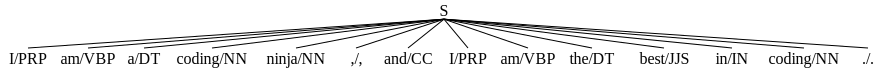

In [ ]:
#exp-9(chunked text)

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
sample_text= "I am a coding ninja, and I am the best in coding."
import os
os.system('Xvfb :1 -screen 0 1600x1200x16 &') # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0' # tell X clients to use our virtual DISPLAY :1.0.
%matplotlib inline
from nltk.tree import Tree
from IPython.display import display
tokenized=nltk.sent_tokenize(sample_text)
for i in tokenized:
 words=nltk.word_tokenize(i)
 tagged_words=nltk.pos_tag(words)
 print(tagged_words)
 chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}""" # this is the grammar that we define,
 chunkParser=nltk.RegexpParser(chunkGram)
 chunked=chunkParser.parse(tagged_words)
 tree = Tree.fromstring(str(chunked))
 display(tree)




In [35]:
#exp-10(chunk parser)

D=print
import nltk as A
A.download('punkt')
A.download('averaged_perceptron_tagger')
A.download('conll2000')
from nltk.corpus import conll2000 as E
from nltk.chunk import conlltags2tree as F,tree2conlltags as G
from nltk import ChunkParserI as H,TrigramTagger as I
import random as J
B=list(E.chunked_sents())
J.shuffle(B)
K=B[:int(len(B)*.9)]
L=B[int(len(B)*.9+1):]
class M(H):
  D(C.evaluate(L))
  N='He’s really into the spooky decorative light fixture.'
  O=A.word_tokenize(N)
  Q=C.parse(P)
  D(Q)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
<ipython-input-35-40ad9959dd22>:15: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  D(C.evaluate(L))


ChunkParse score:
    IOB Accuracy:  88.2%%
    Precision:     80.9%%
    Recall:        84.6%%
    F-Measure:     82.7%%
(S
  (NP He/PRP)
  (VP ’/VBZ)
  s/JJ
  really/RB
  (PP into/IN)
  (NP the/DT spooky/JJ decorative/JJ light/NN fixture/NN)
  ./.)
